In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
import yfinance as yf
import heapq
import talib as ta
import warnings
warnings.filterwarnings('ignore')

In [2]:
def get_daily_ohlcv(tickers, years=4):
    outo=[]
    outh=[]
    outl=[]
    outc=[]
    outv=[]
    oute=[]
    outdf=[]
    months=str(years*12)
    for ticker in tickers:
        tick=yf.Ticker(ticker)
        df=tick.history(period=months+"mo")
        df=df.reset_index()
        df.dropna(inplace=True)
        outdf.append(df)
    return outdf

In [3]:
def concat_tickers(tickers):
    out=""
    for ticker in tickers:
        out=out+" "+ticker
    return out

In [4]:
def addNS(ticks):
    return [tick+'.NS' for tick in ticks]
s = np.random.normal(0, 1, 1000)
s2 = np.random.normal(0, 1, 1000)

In [5]:
def sh(a):
    a2=a.copy()
    np.random.shuffle(a2)
    return a2

def aggsh(a):
    out=[a[0]]+list(sh(di(a)))
    return accumulate(out)

def sharpe(a):
    return np.mean(a)/np.std(a)

def sharpe2(agg):
    a=di(agg)
    return sharpe(a)*np.sqrt(len(a))

def sigrobust(sigactual,mush,sigmash):
    return np.sign(sigactual)*(abs(sigactual)-mush)/sigmash

def di(a):
    return np.asarray([a[i+1]-a[i] for i in range(len(a)-1)])

In [6]:
def getleneq(array):
    lens=[len(x) for x in array] 
    maxlen=max(lens)
    out=[]
    for lst in array:
        if len(lst)==maxlen:
            out.append(lst)
    return maxlen,np.asarray(out)
def listsum(vecs):
    vecs=getleneq(vecs)[1]
    out=np.asarray(vecs[0])
    for i in range(1,len(vecs)):
        out=out+np.asarray(vecs[i])
    return np.asarray(out)

def accumulate(a):
    out=[a[0]]
    for i in range(1,len(a)):
        out.append(out[i-1]+a[i])
    return np.asarray(out)

def listmean(a):
    return [np.mean(a[i]) for i in range(len(a))]

def klargest(nums, k):
    h = []
    for e in nums:
        heapq.heappush(h, (-e, e))
    klarg=[]
    for i in range(k):
        w, e = heapq.heappop(h)
        klarg.append(e)
    return np.asarray(klarg)

def trunc_sig(signals,trades=5):
    klargabs=klargest(abs(signals),trades)
    out=[]
    for i in range(len(signals)):
        if abs(signals[i]) in klargabs:
            out.append(signals[i])
        else:
            out.append(0)
    return np.asarray([np.asarray(out)[i] for i in range(len(out))])


def trunc_siglo(signals,trades=5):
    klarg=klargest(signals,trades)
    out=[]
    for i in range(len(signals)):
        if signals[i] in klarg and signals[i]>0:
            out.append(signals[i])
        else:
            out.append(0)
    return np.asarray([np.asarray(out)[i] for i in range(len(out))])

def my_kendall_trend(a):
    out=[]
    for i in range(len(a)):
        for j in range(i):
            out.append(np.sign(a[i]-a[j]))
    numpos=len([el for el in out if el>0 ])
    numneg=len([el for el in out if el<0 ])
    return (numpos-numneg)/len(out)

def di_atoa(a):
    out=[]
    for i in range(len(a)):
        for j in range(i):
            out.append(a[i]-a[j])
    return out


def di_atoa2(a):
    out=[]
    for i in range(len(a)):
        for j in range(i):
            out.append(a[i]-a[j])
    return out/np.std(a)

def ns_mean(a,opt=3):
    if opt==-1:
        return np.mean(a)
    
    if opt==0:
        return np.mean(a)-np.mean(di(a))
    
    elif opt==1:
        halflen=round(len(a)/2)
        if abs(np.mean(a[:halflen]))<=abs(np.mean(a[halflen:])):
            return np.mean(a[:halflen])
        else:
            return 0
    elif opt==2:
        return np.mean(a)-np.mean(di_atoa(a))
    elif opt==3:
        kt=my_kendall_trend(a)
        mna=np.mean(a)
        if mna*kt>0:
            return mna
        else:
            return 0
    elif opt==4:
        kt=my_kendall_trend(a)
        mna=np.mean(a)
        if mna*kt>0:
            return mna*kt
        else:
            return 0
    elif opt==5:
        return kalman_mean(a)
    elif opt==-2:
        return np.mean(a)+np.mean(di_atoa(a))
    elif opt==-3:
        kt=np.mean(di_atoa(a))
        mna=np.mean(a)
        if mna*kt>0:
            return mna
        else:
            return 0
    elif opt==-4:
        return np.mean(a)+np.mean(di_atoa2(a))
    
    elif opt==-5:
        kt=np.mean(di_atoa(a))
        kt2=np.mean(di_atoa(di(a)))
        mna=np.mean(a)
        if mna*kt>0 and mna*kt2>0:
            return mna
        else:
            return 0
    elif opt==-6:
        kt=np.mean(di_atoa(a))
        kt2=np.mean(di_atoa(di(a)))
        kt3=np.mean(di_atoa(di(di(a))))
        mna=np.mean(a)
        if mna*kt>0 and mna*kt2>0 and mna*kt3>0:
            return mna
        else:
            return 0
    elif opt==-7:
        kt=np.mean(my_kendall_trend(a))
        kt2=np.mean(my_kendall_trend(di(a)))
        mna=np.mean(a)
        if mna*kt>0 and mna*kt2>0:
            return mna
        else:
            return 0
    elif opt==-8:
        kt=np.mean(my_kendall_trend(a))
        kt2=np.mean(my_kendall_trend(di(a)))
        kt3=np.mean(my_kendall_trend(di(di(a))))
        mna=np.mean(a)
        if mna*kt>0 and mna*kt2>0 and mna*kt3>0:
            return mna
        else:
            return 0
        

def sk_minfo(x,y,norm=True):
    bXY=numBins(x.shape[0],corr=np.corrcoef(x,y)[0,1])
    cXY=np.histogram2d(x,y,bXY)[0] 
    iXY=metrics.mutual_info_score(None,None,contingency=cXY) 
    if norm: 
        hX=st.entropy(np.histogram(x,bXY)[0]) 
        hY=st.entropy(np.histogram(y,bXY)[0]) 
        iXY/=min(hX,hY) 
    return iXY


def sk_mic(x,y,norm=True):
    estbins=numBins(x.shape[0],corr=np.corrcoef(x,y)[0,1])
    bXYs=[i for i in range(20)]
    iXYs=[]
    for bXY in bXYs:
        cXY=np.histogram2d(x,y,bXY)[0] 
        iXYs.append(metrics.mutual_info_score(None,None,contingency=cXY)) 
    if norm: 
        hX=st.entropy(np.histogram(x,bXY)[0])
        hY=st.entropy(np.histogram(y,bXY)[0]) 
        iXY/=min(hX,hY) 
    return max(iXYs)


def numBins(nObs,corr=None): 
    if corr is None: 
        z=(8+324*nObs+12*(36*nObs+729*nObs**2)**.5)**(1/3.) 
        b=round(z/6.+2./(3*z)+1./3) 
    else:  
        b=round(2**-.5*(1+(1+24*nObs/(1.-corr**2))**.5)**.5) 
        b=min(b,50)
    return int(b)

def eqwt_memb(logrets,lb=10,cost=0.0,long=True,binmem=False):
    
    mmax=0
    n,lrs=getleneq(logrets)
    
    print(n)
    print(len(lrs))
    out=[]
    capital=[]
    for i in range(lb,n-mmax-1,mmax+1):
        if long:
            pred=np.ones(len(lrs[:,-2+i:i]))
        else:
            pred=-np.ones(len(lrs[:,-2+i:i]))
        pred=np.nan_to_num(pred/np.sum(abs(pred)),nan=0)
        
        y=lrs[:,i]
        
        if binmem:
            y=np.sign(y)
        
        out.append(np.dot(pred,np.e**(y)-1))
        
        capital.append(1)
    return accumulate(out)/np.mean(capital)

def random_memb(logrets,lb=10,cost=0.0,longonly=True,binmem=False):
    
    mmax=0
    n,lrs=getleneq(logrets)
    
    print(n)
    print(len(lrs))
    out=[]
    capital=[]
    for i in range(lb,n-mmax-1,mmax+1):
        randsh=sh(np.arange(len(lrs)))[0]
        randsgn=sh([1,-1])[0]
        if longonly:
            pred=np.asarray([0 if i!=randsh else 1 for i in range(len(lrs))])
        else:
            pred=np.asarray([0 if i!=randsh else 1 for i in range(len(lrs))])*randsgn
        pred=np.nan_to_num(pred/np.sum(abs(pred)),nan=0)
        
        y=lrs[:,i]
        #
        if binmem:
            y=np.sign(y)
        
        out.append(np.dot(pred,np.e**(y)-1))
        
        capital.append(1)
    return accumulate(out)/np.mean(capital)


def perment(a,m=4,tau=1):    
    return entrp.permutation_entropy(a,m,tau)
def sampent(ts,m=4,r=0.2):
    std_ts = np.std(ts)
    return entrp.sample_entropy(ts, m, r * std_ts)


In [7]:
def multibinfunc2(reg,ret,dmn=True,nsopt=-1,delay=1):
    ret2=ret
    if dmn:
        ret = ret - np.mean(ret)
    dot_prod = np.mean(np.sign(reg[:-delay]*ret2[delay:]))*np.sign(reg[-1])
    return dot_prod


def theta_mem(reg,ret,lb=20,delay=1):
    out=[]
    for i in range(20,len(ret)):
        out.append(multibinfunc2th(reg[i-lb:i],ret[i-lb:i],delay=delay))
    return out


def perm_mem(reg,ret,lb=20,delay=1):
    out=[]
    for i in range(20,len(ret)):
        out.append(multibinfunc2(reg[i-lb:i],ret[i-lb:i],delay=delay))
    return out


def corrcoef_sh(reg,ret,nbsh=10):
    outsh=[]
    for i in range(nbsh):
        outsh.append(np.corrcoef(reg,sh(ret))[0][1])
    return np.mean(outsh)

def skminfo_sh(reg,ret,nbsh=10):
    outsh=[]
    for i in range(nbsh):
        outsh.append(sk_minfo(reg,sh(ret)))
    return np.mean(outsh)

def thetamem_sh(reg,ret,nbsh=10):
    outsh=[]
    for i in range(nbsh):
        outsh.append(sharpe(theta_mem(reg,sh(ret))))
    return np.mean(outsh)

def perm_mem_sh(reg,ret,nbsh=10):
    outsh=[]
    for i in range(nbsh):
        outsh.append(sharpe(perm_mem(reg,sh(ret))))
    return np.mean(outsh)


In [8]:
def tp_memb(alphas,logrets,lbmom=20,lf=1,trades=-1,cost=0.0,signed=False,longonly=True,nsopt=-1):
    mmax=0
    n,lrs=getleneq(logrets)
    
    print(n)
    print(len(lrs))
    out=[]
    capital=[]
    for i in range(lbmom,n-mmax-1,mmax+1):
        if signed:
            
            pred=np.sign(listmean(alphas[:,-lbmom+i:i]))
        else:
            
            pred=listmean(alphas[:,-lbmom+i:i])
        if longonly:
            pred=np.heaviside(pred,0)*pred
        if trades>0:
            pred=trunc_siglo(pred,trades)
        
        pred=np.nan_to_num(pred,nan=0)
        pred=np.nan_to_num(pred/np.sum(abs(pred)),nan=0)
        
        y=np.asarray(listmean(lrs[:,i:i+lf]))
        out.append(np.dot(pred,np.e**(y)-1))
        capital.append(1)
    return accumulate(out)/np.mean(capital)


def multibinfunc2(reg,ret,dmn=True,nsopt=-1,delay=1):
    ret2=ret
    if dmn:
        reg = reg - np.mean(reg)
    dot_prod = ns_mean(np.sign(reg[:-delay]*ret2[delay:]),nsopt)*np.sign(reg[-1])
    return dot_prod

def multibinfunc2th(reg,ret,dmn=True,opt=0,trig=0,nsopt=-1,delay=1):
    ret2=ret
    if dmn:
        reg = reg - np.mean(reg)
    if opt==0:
        dot_prod = ns_mean(np.heaviside(np.sign(reg[:-delay])*np.sign(reg[-1]),0)*np.sign(ret2[delay:]),nsopt)
    if abs(dot_prod)>trig:
        return dot_prod
    else:
        return 0

def multibinpred2(regs,rets,dmn=True,nsopt=-1,delay=1):
    return np.asarray([multibinfunc2(regs[i],rets[i],dmn=dmn,nsopt=nsopt,delay=delay) for i in range(len(rets))])

def multibinpred2th(regs,rets,dmn=True,nsopt=-1,delay=1):
    return np.asarray([multibinfunc2th(regs[i],rets[i],dmn=dmn,nsopt=nsopt,delay=delay) for i in range(len(rets))])

def multibin2pt_memb(regs,logrets,lb=20,cost=0.0,trades=-1,dmn=True,longonly=True,nsopt=-1,th=False,delay=1):
    
    mmax=0
    n,lrs=getleneq(logrets)
    n,rgs=getleneq(regs)
    
    print(n)
    print(len(lrs))
    out=[]
    capital=[]
    for i in range(lb,n-mmax-1,mmax+1):
        if th:
            pred=multibinpred2th(rgs[:,-lb+i:i],lrs[:,-lb+i:i],dmn=dmn,nsopt=nsopt,delay=delay)
        else:
            pred=multibinpred2(rgs[:,-lb+i:i],lrs[:,-lb+i:i],dmn=dmn,nsopt=nsopt,delay=delay)
        if trades>0:
            if longonly:
                pred=np.asarray(trunc_siglo(pred,trades))
            else:
                pred=np.asarray(trunc_sig(pred,trades))
        pred=np.nan_to_num(pred/np.sum(abs(pred)),nan=0)
        y=lrs[:,i]
       
        out.append(np.dot(pred,np.e**(y)-1))
        
        capital.append(1)
    return accumulate(out)/np.mean(capital)

def multibin2pt_membml(regs,logrets,lb=20,cost=0.0,trades=-1,dmn=True,longonly=True,nsopt=-1,th=False):
    mb1=multibin2pt_memb(regs,logrets,lb=lb,cost=cost,trades=trades,dmn=dmn,longonly=longonly,nsopt=nsopt,th=th,delay=1)
    mb2=multibin2pt_memb(regs,logrets,lb=lb,cost=cost,trades=trades,dmn=dmn,longonly=longonly,nsopt=nsopt,th=th,delay=2)
    mb3=multibin2pt_memb(regs,logrets,lb=lb,cost=cost,trades=trades,dmn=dmn,longonly=longonly,nsopt=nsopt,th=th,delay=3)
    mb4=multibin2pt_memb(regs,logrets,lb=lb,cost=cost,trades=trades,dmn=dmn,longonly=longonly,nsopt=nsopt,th=th,delay=4)
    mb5=multibin2pt_memb(regs,logrets,lb=lb,cost=cost,trades=trades,dmn=dmn,longonly=longonly,nsopt=nsopt,th=th,delay=5)
    return (mb1+mb2+mb3+mb4+mb5)/5

In [9]:
def get_signalact(alphas,logrets,lb=20,delay=1,trades=-1,nsopt=-1,dmn=True,longonly=True,th=False):
    outcc=[]
    outminfo=[]
    outthetamem=[]
    outpermmem=[]
    outmem=[]
    multimem=multibin2pt_memb(alphas,logrets,lb=lb,trades=trades,nsopt=nsopt,th=th,longonly=longonly,dmn=dmn,delay=delay)
    tpmem=tp_memb(alphas,logrets,lbmom=lb,trades=trades,longonly=longonly)
    for i in range(len(logrets)):
        alpha=np.nan_to_num(alphas[i],0)
        returns=np.nan_to_num(logrets[i],0)
        outcc.append(np.corrcoef(alpha[:-delay],returns[delay:])[0][1])
        try:
            outminfo.append(sk_minfo(np.asarray(alpha[:-delay]),np.asarray(returns[delay:])))
        except:
            outminfo.append(0)
        thm=theta_mem(alpha,returns)
        pm=perm_mem(alpha,returns)
        
        outthetamem.append(thm)
        outpermmem.append(pm)
    return outcc, outminfo, outthetamem, outpermmem,multimem,tpmem


def get_signalsh(alphas,logrets,lb=20,delay=1):
    outcc=[]
    outminfo=[]
    outthetamem=[]
    outpermmem=[]
    multimem=multibin2pt_memb(alphas,logrets,lb=lb)
    tpmem=tp_memb(alphas,logrets,lbmom=lb)
    for i in range(len(logrets)):
        alpha=np.nan_to_num(alphas[i],0)
        returns=np.nan_to_num(logrets[i],0)
        outcc.append(corrcoef_sh(alpha[:-delay],returns[delay:]))
        try:
            outminfo.append(skminfo_sh(np.asarray(alpha[:-1]),np.asarray(returns[1:])))
        except:
            outminfo.append(0)
        thm=thetamem_sh(alpha,returns)
        pm=permmem_sh(alpha,returns)
        outthetamem.append(thm)
        outpermmem.append(pm)
    return outcc, outminfo, outthetamem, outpermmem,multimem,tpmem   

In [10]:
def get_signalact2(alphas,logrets,lb=20,delay=1,dmn=True,longonly=True,trades=1):
    assert len(alphas)==len(logrets)
    logrets=logrets[:,-len(alphas[0]):]
    outcc=[]
    outminfo=[]
    outccsh=[]
    outminfosh=[]
    outthetamem=[]
    outpermmem=[]
    outmem=[]
    index = ['mm1', 'mm2', 'mm3','mm4', 'mm5', 'mm6', 'mm7','mm8','tpmem','tpmem2']
    tpmem=tp_memb(alphas,logrets,lbmom=lb,trades=1,longonly=longonly)
    tpmem2=tp_memb(alphas,logrets,lbmom=lb,trades=5,longonly=longonly)
    multimem1=multibin2pt_memb(alphas,logrets,lb=lb,trades=trades,nsopt=-1,longonly=longonly,dmn=dmn,delay=delay,th=False)
    multimem2=multibin2pt_memb(alphas,logrets,lb=lb,trades=trades,nsopt=3,longonly=longonly,dmn=dmn,delay=delay,th=False)
    multimem3=multibin2pt_memb(alphas,logrets,lb=lb,trades=trades,nsopt=-3,longonly=longonly,dmn=dmn,delay=delay,th=False)
    multimem4=multibin2pt_memb(alphas,logrets,lb=lb,trades=trades,nsopt=-7,longonly=longonly,dmn=dmn,delay=delay,th=False)
    multimem5=multibin2pt_memb(alphas,logrets,lb=lb,trades=trades,nsopt=-1,longonly=longonly,dmn=dmn,delay=delay,th=True)
    multimem6=multibin2pt_memb(alphas,logrets,lb=lb,trades=trades,nsopt=3,longonly=longonly,dmn=dmn,delay=delay,th=True)
    multimem7=multibin2pt_memb(alphas,logrets,lb=lb,trades=trades,nsopt=-3,longonly=longonly,dmn=dmn,delay=delay,th=True)
    multimem8=multibin2pt_memb(alphas,logrets,lb=lb,trades=trades,nsopt=-7,longonly=longonly,dmn=dmn,delay=delay,th=True)
    
    eqmem=eqwt_memb(logrets)
    
    multimem=[multimem1,multimem2,multimem3,multimem4,multimem5,multimem6,multimem7,multimem8,tpmem,tpmem2]
    for i in range(len(logrets)):
        alpha=np.nan_to_num(alphas[i],0)
        returns=np.nan_to_num(logrets[i],0)
        try:
            outcc.append(np.corrcoef(alpha[:-delay],returns[delay:])[0][1])
            outccsh.append(corrcoef_sh(alpha[:-delay],returns[delay:]))
        except:
            outcc.append(0)
            outccsh.append(0)
        try:
            outminfo.append(sk_minfo(np.asarray(alpha[:-delay]),np.asarray(returns[delay:])))
            outminfosh.append(skminfo_sh(np.asarray(alpha[:-delay]),np.asarray(returns[delay:])))
        except:
            outminfo.append(0)
            outminfosh.append(0)
    outmmr=[multimem[i][-1] for i in range(len(multimem))]
    outmms=[sharpe2(multimem[i]) for i in range(len(multimem))]
    eqmemr=[eqmem[-1] for i in range(len(multimem))]
    eqmems=[sharpe2(eqmem) for i in range(len(multimem))]
    plt.plot(outcc)
    plt.plot(outccsh)
    plt.show()
    plt.plot(outminfo)
    plt.plot(outminfosh)
    plt.show()
    df = pd.DataFrame({'alphar': outmmr,'benchmarkr': eqmemr}, index=index)
    ax = df.plot.bar(rot=0)
    df = pd.DataFrame({'alphas': outmms,'benchmarks': eqmems}, index=index)
    ax = df.plot.bar(rot=0)
    return outcc,outminfo,outmmr,outmms

In [11]:
def get_signalact2_random(alphas,logrets,lb=20,delay=1,dmn=True,longonly=True,trades=1):
    #alphas may take some training data; so log returns can be adjusted accordingly
    assert len(alphas)==len(logrets)
    logrets=logrets[:,-len(alphas[0]):]
    outcc=[]
    outminfo=[]
    outccsh=[]
    outminfosh=[]
    outthetamem=[]
    outpermmem=[]
    outmem=[]
    index = ['mm1', 'mm2', 'mm3','mm4', 'mm5', 'mm6', 'mm7','mm8','tpmem','tpmem2']
    tpmem=random_memb(logrets)
    tpmem2=random_memb(logrets)
    multimem1=random_memb(logrets)
    multimem2=random_memb(logrets)
    multimem3=random_memb(logrets)
    multimem4=random_memb(logrets)
    multimem5=random_memb(logrets)
    multimem6=random_memb(logrets)
    multimem7=random_memb(logrets)
    multimem8=random_memb(logrets)
    eqmem=eqwt_memb(logrets)
    multimem=[multimem1,multimem2,multimem3,multimem4,multimem5,multimem6,multimem7,multimem8,tpmem,tpmem2]
    for i in range(len(logrets)):
        alpha=np.nan_to_num(alphas[i],0)
        returns=np.nan_to_num(logrets[i],0)
        try:
            outcc.append(np.corrcoef(alpha[:-delay],sh(returns[delay:]))[0][1])
            outccsh.append(corrcoef_sh(alpha[:-delay],sh(returns[delay:])))
        except:
            outcc.append(0)
            outccsh.append(0)
        try:
            outminfo.append(sk_minfo(np.asarray(alpha[:-delay]),sh(np.asarray(returns[delay:]))))
            outminfosh.append(skminfo_sh(np.asarray(alpha[:-delay]),sh(np.asarray(returns[delay:]))))
        except:
            outminfo.append(0)
            outminfosh.append(0)
    outmmr=[multimem[i][-1] for i in range(len(multimem))]
    outmms=[sharpe2(multimem[i]) for i in range(len(multimem))]
    eqmemr=[eqmem[-1] for i in range(len(multimem))]
    eqmems=[sharpe2(eqmem) for i in range(len(multimem))]
    plt.plot(outcc)
    plt.plot(outccsh)
    plt.show()
    plt.plot(outminfo)
    plt.plot(outminfosh)
    plt.show()
    df = pd.DataFrame({'alphar': outmmr,'benchmarkr': eqmemr}, index=index)
    ax = df.plot.bar(rot=0)
    df = pd.DataFrame({'alphas': outmms,'benchmarks': eqmems}, index=index)
    ax = df.plot.bar(rot=0)
    return outcc,outminfo,outmmr,outmms

In [12]:
from scipy.stats import rankdata
def rankdata_2d(array2d,axis=0):
    """
    Input: 2d array
    Output:
    axis=0: time series rank
    axis=1: cross sectional rank
    """
    if axis==0:
        return np.asarray([rankdata(array1d) for array1d in array2d])
    elif axis==1:
        array2dt=np.transpose(array2d)
        return np.transpose([rankdata(array1d) for array1d in array2dt])
    
# RTime Series Rank
def ts_rank(qty,window=10):
    n,qty=getleneq(qty)[1]
    out=[]
    for i in range(n):
        out.append(rankdata_2d(qty[:,i-window:i])[:,-1])
    return out

# Cross Sectional Rank, also called 'Rank' by Kakushadze
def cs_rank(qty):
    """
    Input: 2-d array of qty
    Output: 2-d array of ranks
    """
    n,qty=getleneq(qty)
    return rankdata_2d(qty,axis=1)

#Calculate and store the Log Returns
def logrets(ohlcv_data):
    """
    Input: OHLCV list of dfs
    Output: 2-d array of Log Returns [logret(stock1),...logret(stock k)]
    """
    sectalpha1=[]
    for i in range(len(ohlcv_data)):
        sectalpha1.append(np.log(ohlcv_data[i]['Close']/ohlcv_data[i]['Close'].shift(1)))
    return getleneq(sectalpha1)[1]

def idlogrets(ohlcv_data):
    """
    Input: OHLCV list of dfs
    Output: 2-d array of Intraday Log Returns [logret(stock1),...logret(stock k)]
    """
    sectalpha1=[]
    for i in range(len(ohlcv_data)):
        sectalpha1.append(np.log(ohlcv_data[i]['Close']/ohlcv_data[i]['Open']))
    return getleneq(sectalpha1)[1]

def onlogrets(ohlcv_data):
    """
    Input: OHLCV list of dfs
    Output: 2-d array of Overnight Log Returns [logret(stock1),...logret(stock k)]
    """
    sectalpha1=[]
    for i in range(len(ohlcv_data)):
        sectalpha1.append(np.log(ohlcv_data[i]['Open']/ohlcv_data[i]['Close'].shift(1)))
    return getleneq(sectalpha1)[1]

def get_opens(ohlcv_data):
    """
    Input: OHLCV list of dfs
    Output: 2-d array of opens [open(stock1),...open(stock k)]
    """
    sectalpha1=[]
    for i in range(len(ohlcv_data)):
        sectalpha1.append(ohlcv_data[i]['Open'])
    return getleneq(sectalpha1)[1]

def get_volumes(ohlcv_data):
    """
    Input: OHLCV list of dfs
    Output: 2-d array of opens [open(stock1),...open(stock k)]
    """
    sectalpha1=[]
    for i in range(len(ohlcv_data)):
        sectalpha1.append(ohlcv_data[i]['Volume'])
    return getleneq(sectalpha1)[1]

In [13]:
tickers_ltp= ['TSLA', 'ROKU', 'MRNA', 'PDD', 'NVDA', 'ETSY', 'FB', 'SQ', 'BA',
       'DIS', 'PLUG', 'IWM', 'XBI', 'MSFT', 'QQQ', 'AAPL', 'BABA', 'FSLY',
       'PYPL', 'SPY', 'TSM', 'CHWY', 'JPM', 'AMAT', 'XOP', 'SNAP', 'QCOM',
       'NET', 'IBB', 'MU', 'AXP', 'CVX', 'V', 'BRK.B', 'UBER', 'ABBV',
       'JD', 'TWTR', 'LYFT', 'KSS', 'CZR', 'MPC', 'XLK', 'SBUX', 'COF',
       'VLO', 'JNJ', 'MA', 'WDC', 'IBM']

In [14]:
stock=get_daily_ohlcv(tickers_ltp)

- BRK.B: No data found, symbol may be delisted


In [15]:
type(stock)

list

In [16]:
def getting_close(data):
    for i in range(len(data)):
        cl=data[i]['Close']
    return cl

In [17]:
Close = getting_close(stock)   
Close

0       116.281799
1       116.845268
2       117.781616
3       118.444511
4       119.107422
           ...    
1002    143.179993
1003    143.589996
1004    142.419998
1005    139.470001
1006    137.589996
Name: Close, Length: 1007, dtype: float64

In [18]:
def getting_open(data):
    for i in range(len(data)):
        op=data[i]['Open']
    return op

In [19]:
Open = getting_open(stock)
Open

0       115.668608
1       116.538679
2       116.588385
3       118.079912
4       118.742822
           ...    
1002    142.639999
1003    143.229996
1004    143.000000
1005    141.669998
1006    138.690002
Name: Open, Length: 1007, dtype: float64

In [20]:
def getting_high(data):
    for i in range(len(data)):
        hi=data[i]['High']
    return hi

In [21]:
High = getting_high(stock)
High

0       116.356373
1       116.961276
2       118.535673
3       119.057690
4       119.480303
           ...    
1002    143.580002
1003    143.740005
1004    143.160004
1005    141.919998
1006    139.449997
Name: High, Length: 1007, dtype: float64

In [22]:
def getting_low(data):
    for i in range(len(data)):
        lo=data[i]['Low']
    return lo

In [23]:
Low = getting_low(stock)
Low

0       115.287445
1       116.323239
2       116.571809
3       117.872754
4       118.701388
           ...    
1002    142.440002
1003    142.229996
1004    141.089996
1005    139.389999
1006    137.330093
Name: Low, Length: 1007, dtype: float64

In [24]:
def getting_volume(data):
    for i in range(len(data)):
        vo=data[i]['Volume']
        return vo

In [25]:
Volume = getting_volume(stock)
Volume

0       32477000
1       21610000
2       24772500
3       22923500
4       17420000
          ...   
1002    16698900
1003    22677400
1004    23721300
1005    20220400
1006     6821404
Name: Volume, Length: 1007, dtype: int64

In [28]:
#CDL2CROWS - Two Crows
#integer = CDL2CROWS(open, high, low, close)
def mi01(data):
    mi=[]
    for i in range(len(data)):
        if len(data[i])>0:
            out=ta.CDL2CROWS(np.asarray(list(data[i]['Open'])), np.asarray(list(data[i]['High'])), np.asarray(list(data[i]['Low'])), np.asarray(list(data[i]['Close'])))
            ou=np.nan_to_num(out, 0)
            mi.append(np.asarray(out))
    return getleneq(mi)[1]

In [29]:
mi01(stock)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [30]:
len(mi01(stock))

41

In [31]:
len(onlogrets(stock))

41

1007
41
1007
41
1007
41
1007
41
1007
41
1007
41
1007
41
1007
41
1007
41
1007
41
1007
41


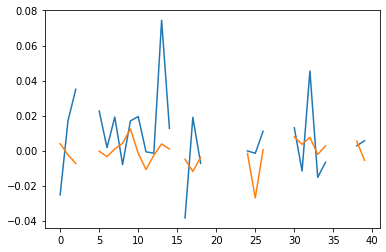

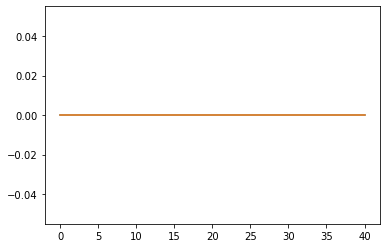

Wall time: 2min 31s


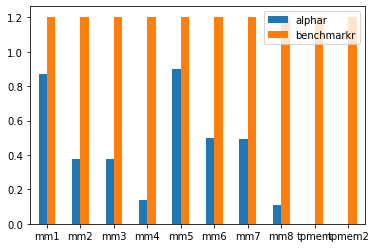

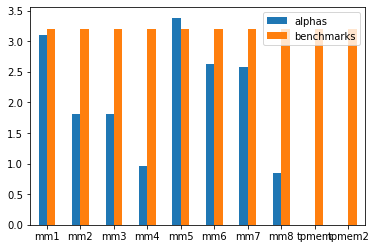

In [32]:
%%time
sig=get_signalact2(mi01(stock), onlogrets(stock), delay=1)

In [33]:
#CDL3BLACKCROWS - Three Black Crows
#integer = CDL3BLACKCROWS(open, high, low, close)
def mi02(data):
    mi=[]
    for i in range(len(data)):
        if len(data[i])>0:
            a=ta.CDL3BLACKCROWS(np.asarray(list(data[i]['Open'])), np.asarray(list(data[i]['High'])), np.asarray(list(data[i]['Low'])), np.asarray(list(data[i]['Close'])))
            b=np.nan_to_num(a, 0)
            mi.append(np.asarray(b))
    return getleneq(mi)[1]
        
mi02(stock)        

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

1007
41
1007
41
1007
41
1007
41
1007
41
1007
41
1007
41
1007
41
1007
41
1007
41
1007
41


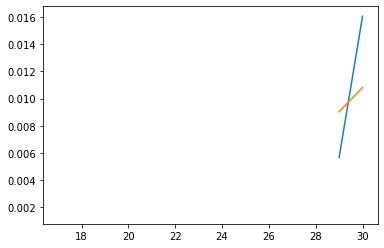

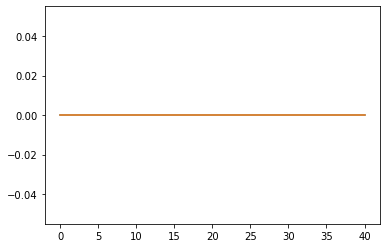

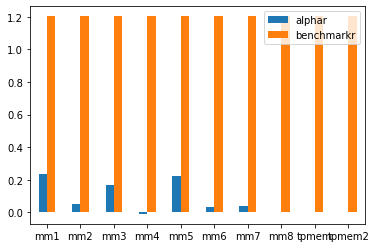

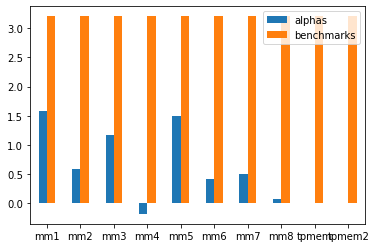

In [34]:
sig=get_signalact2(mi02(stock), onlogrets(stock), delay=1)

In [35]:
#CDL3INSIDE - Three Inside Up/Down
#integer = CDL3INSIDE(open, high, low, close)
def mi03(data):
    mi=[]
    for i in range(len(data)):
        if len(data[i])>0:
            a=ta.CDL3INSIDE(np.asarray(list(data[i]['Open'])), np.asarray(list(data[i]['High'])), np.asarray(list(data[i]['Low'])), np.asarray(list(data[i]['Close'])))
            v=np.nan_to_num(a, 0)
            mi.append(np.asarray(v))
    return getleneq(mi)[1]
mi03(stock)

array([[   0,    0,    0, ...,    0,    0,    0],
       [   0,    0,    0, ..., -100,    0,    0],
       [   0,    0,    0, ...,    0,    0,    0],
       ...,
       [   0,    0,    0, ...,    0,    0,    0],
       [   0,    0,    0, ...,    0,    0,    0],
       [   0,    0,    0, ...,    0,    0,    0]])

1007
41
1007
41
1007
41
1007
41
1007
41
1007
41
1007
41
1007
41
1007
41
1007
41
1007
41


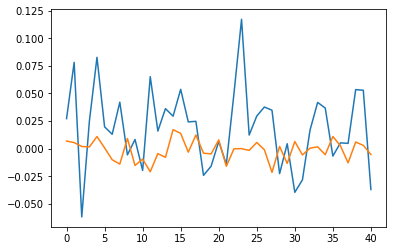

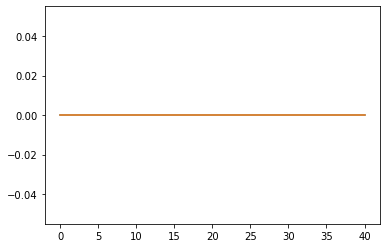

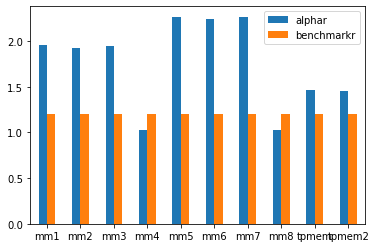

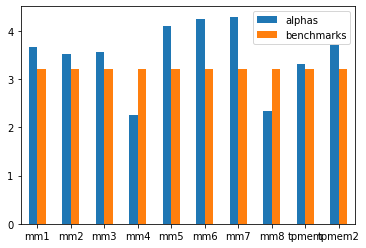

In [36]:
sig=get_signalact2(mi03(stock), onlogrets(stock), delay=1)

In [37]:
#CDL3LINESTRIKE - Three-Line Strike
#integer = CDL3LINESTRIKE(open, high, low, close)
def mi04(data):
    mi=[]
    for i in range(len(data)):
        if len(data[i])>0:
            up=ta.CDL3LINESTRIKE(np.asarray(list(data[i]['Open'])), np.asarray(list(data[i]['High'])), np.asarray(list(data[i]['Low'])), np.asarray(list(data[i]['Close'])))
            cu=np.nan_to_num(up, 0)
            mi.append(np.asarray(cu))
    return getleneq(mi)[1]

mi04(stock)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

1007
41
1007
41
1007
41
1007
41
1007
41
1007
41
1007
41
1007
41
1007
41
1007
41
1007
41


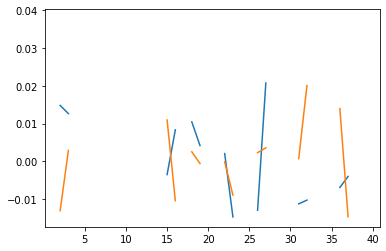

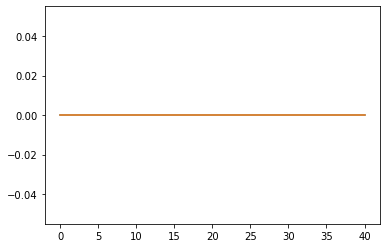

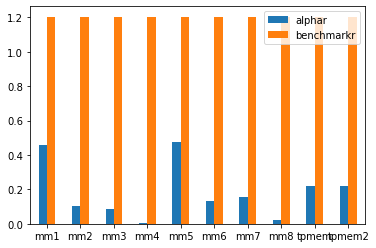

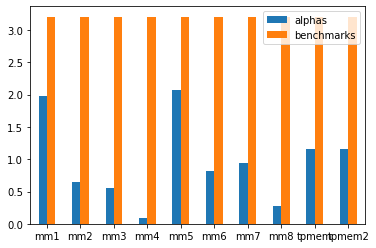

In [38]:
sig=get_signalact2(mi04(stock), onlogrets(stock), delay=1)

In [39]:
#CDL3OUTSIDE - Three Outside Up/Down
#integer = CDL3OUTSIDE(open, high, low, close)
def mi05(data):
    mi=[]
    for i in range(len(data)):
        if len(data[i])>0:
            f=ta.CDL3OUTSIDE(np.asarray(list(data[i]['Open'])), np.asarray(list(data[i]['High'])), np.asarray(list(data[i]['Low'])), np.asarray(list(data[i]['Close'])))
            e=np.nan_to_num(f, 0)
            mi.append(np.asarray(e))
    return getleneq(mi)[1]

mi05(stock)

array([[   0,    0,    0, ...,    0,    0,    0],
       [   0,    0,    0, ...,    0,    0,    0],
       [   0,    0,    0, ...,    0,    0,    0],
       ...,
       [   0,    0,    0, ...,    0,    0,    0],
       [   0,    0,    0, ...,    0,    0, -100],
       [   0,    0,    0, ...,    0,    0,    0]])

1007
41
1007
41
1007
41
1007
41
1007
41
1007
41
1007
41
1007
41
1007
41
1007
41
1007
41


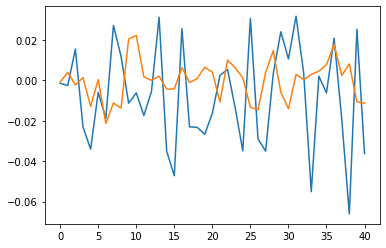

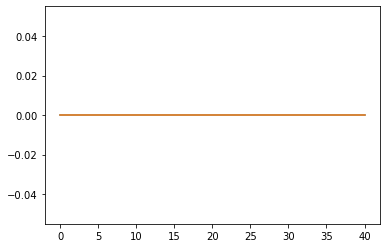

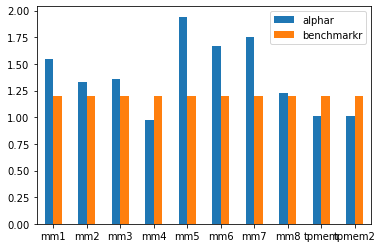

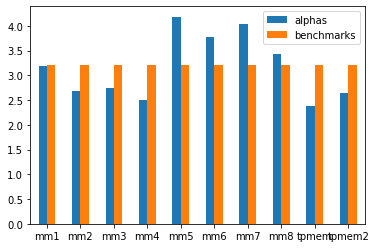

In [40]:
sig=get_signalact2(mi05(stock),onlogrets(stock), delay=1)

In [41]:
#CDL3STARSINSOUTH - Three Stars In The South
#integer = CDL3STARSINSOUTH(open, high, low, close)
def mi06(data):
    mi=[]
    for i in range(len(data)):
        if len(data[i])>0:
            g=ta.CDL3STARSINSOUTH(np.asarray(list(data[i]['Open'])), np.asarray(list(data[i]['High'])), np.asarray(list(data[i]['Low'])), np.asarray(list(data[i]['Close'])))
            h=np.nan_to_num(g, 0)
            mi.append(np.asarray(h))
    return getleneq(mi)[1]
mi06(stock)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

1007
41
1007
41
1007
41
1007
41
1007
41
1007
41
1007
41
1007
41
1007
41
1007
41
1007
41


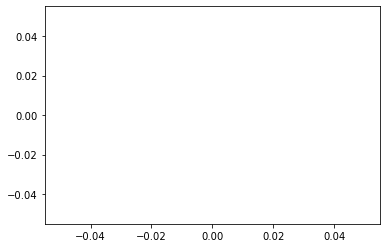

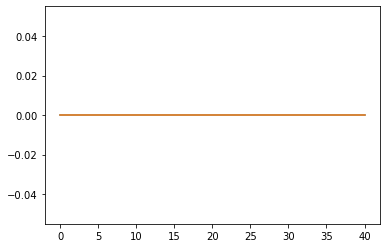

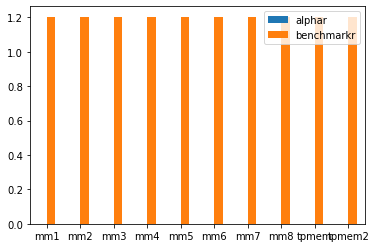

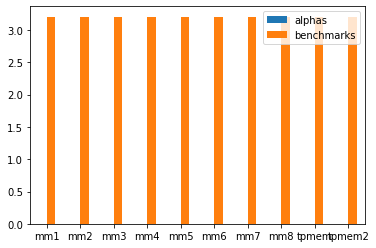

In [42]:
sig=get_signalact2(mi06(stock), onlogrets(stock), delay=1)

In [43]:
#CDL3WHITESOLDIERS - Three Advancing White Soldiers
#integer = CDL3WHITESOLDIERS(open, high, low, close)
def mi07(data):
    mi=[]
    for i in range(len(data)):
        if len(data[i])>0:
            i=ta.CDL3WHITESOLDIERS(np.asarray(list(data[i]['Open'])), np.asarray(list(data[i]['High'])), np.asarray(list(data[i]['Low'])), np.asarray(list(data[i]['Close'])))
            j=np.nan_to_num(i, 0)
            mi.append(np.asarray(j))
    return getleneq(mi)[1]

mi07(stock)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

1007
41
1007
41
1007
41
1007
41
1007
41
1007
41
1007
41
1007
41
1007
41
1007
41
1007
41


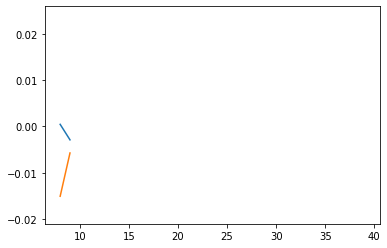

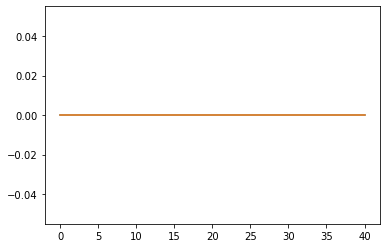

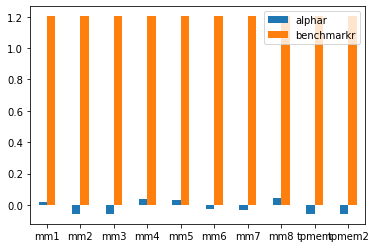

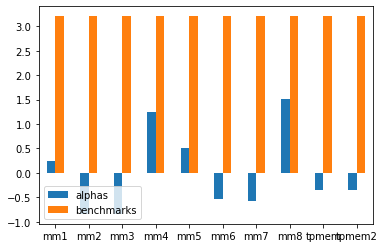

In [44]:
sig=get_signalact2(mi07(stock), onlogrets(stock), delay=1)

In [45]:
# CDLABANDONEDBABY - Abandoned Baby
# integer = CDLABANDONEDBABY(open, high, low, close, penetration=0)
def mi08(data):
    mi=[]
    for i in range(len(data)):
        if len(data[i])>0:
            u=ta.CDLABANDONEDBABY(np.asarray(list(data[i]['Open'])), np.asarray(list(data[i]['High'])), np.asarray(list(data[i]['Low'])), np.asarray(list(data[i]['Close'])), penetration=0)
            v=np.nan_to_num(u, 0)
            mi.append(np.asarray(v))
    return getleneq(mi)[1]
mi08(stock)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

1007
41
1007
41
1007
41
1007
41
1007
41
1007
41
1007
41
1007
41
1007
41
1007
41
1007
41


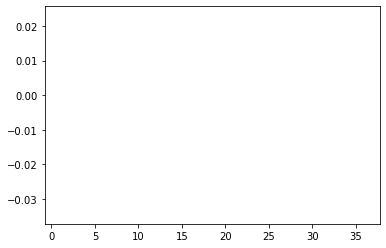

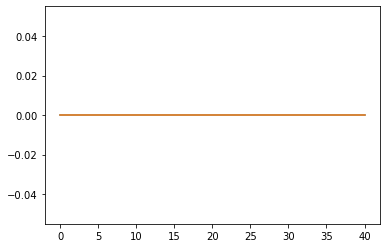

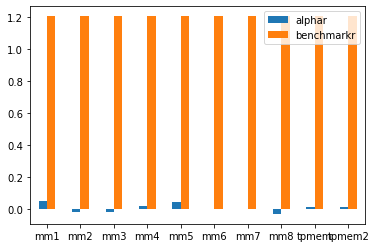

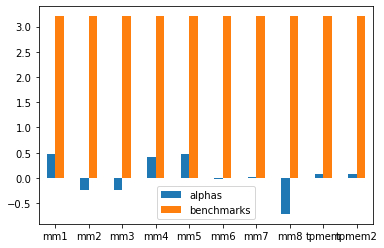

In [46]:
sig=get_signalact2(mi08(stock), onlogrets(stock), delay=1)

In [99]:
#CDLADVANCEBLOCK - Advance Block
#integer = CDLADVANCEBLOCK(open, high, low, close)
def mi09(data):
    mi=[]
    for i in range(len(data)):
        if len(data[i])>0:
            e=ta.CDLADVANCEBLOCK(np.asarray(list(data[i]['Open'])), np.asarray(list(data[i]['High'])), np.asarray(list(data[i]['Low'])), np.asarray(list(data[i]['Close'])))
            d=np.nan_to_num(e, 0)
            mi.append(np.asarray(d))
    return getleneq(mi)[1]
mi09(stock)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [100]:
len(mi09(stock))

41

1007
41
1007
41
1007
41
1007
41
1007
41
1007
41
1007
41
1007
41
1007
41
1007
41
1007
41


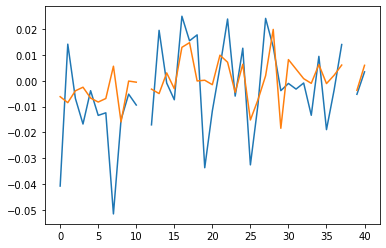

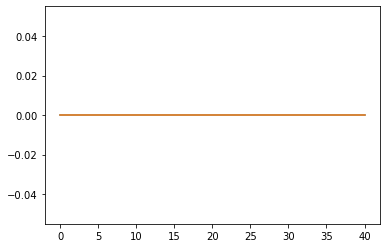

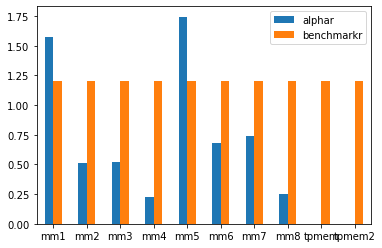

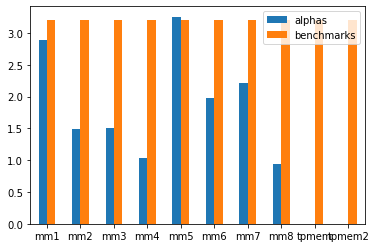

In [101]:
sig=get_signalact2(mi09(stock), onlogrets(stock), delay=1)

In [55]:
# CDLBELTHOLD - Belt-hold
#integer = CDLBELTHOLD(open, high, low, close)

def mi10(data):
    mi=[]
    for i in range(len(data)):
        if len(data[i])>0:
            mac = ta.CDLBELTHOLD(np.asarray(list(data[i]['Open'])), np.asarray(list(data[i]['High'])), np.asarray(list(data[i]['Low'])), np.asarray(list(data[i]['Close'])))
            mac1 = np.nan_to_num(mac, 0)
            mi.append(np.asarray(mac1))
    return getleneq(mi)[1]
mi10(stock)

array([[  0,   0,   0, ...,   0, 100,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ..., 100,   0,   0],
       ...,
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0]])

1007
41
1007
41
1007
41
1007
41
1007
41
1007
41
1007
41
1007
41
1007
41
1007
41
1007
41


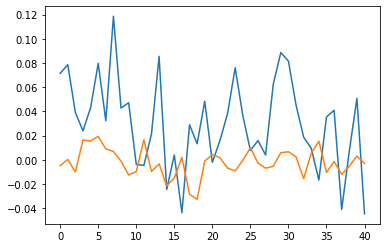

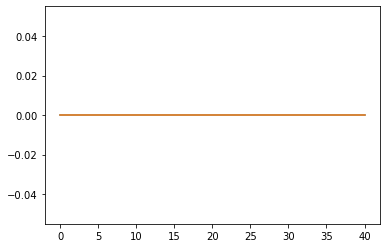

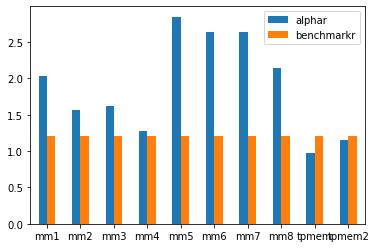

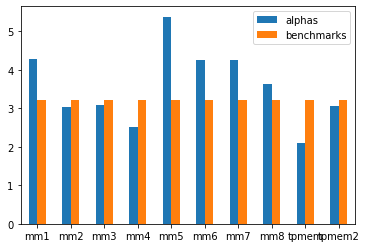

In [56]:
sig=get_signalact2(mi10(stock), onlogrets(stock), delay=1)

In [57]:
# CDLBREAKAWAY - Breakaway
# integer = CDLBREAKAWAY(open, high, low, close)
def mi11(data):
    mi=[]
    for i in range(len(data)):
        if len(data[i])>0:
            mac = ta.CDLBREAKAWAY(np.asarray(list(data[i]['Open'])), np.asarray(list(data[i]['High'])), np.asarray(list(data[i]['Low'])), np.asarray(list(data[i]['Close'])))
            mac2 = np.nan_to_num(mac, 0)
            mi.append(np.asarray(mac2))
    return getleneq(mi)[1]
mi11(stock)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

1007
41
1007
41
1007
41
1007
41
1007
41
1007
41
1007
41
1007
41
1007
41
1007
41
1007
41


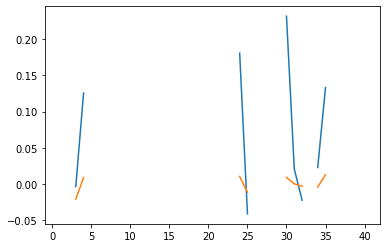

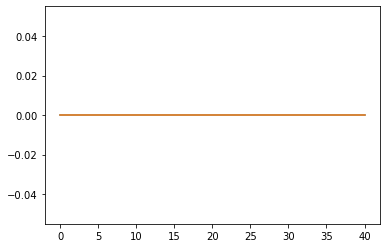

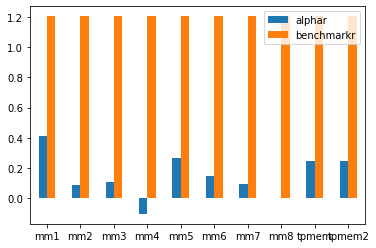

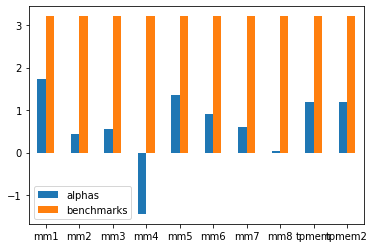

In [58]:
sig=get_signalact2(mi11(stock), onlogrets(stock), delay=1)

In [59]:
# CDLCLOSINGMARUBOZU - Closing Marubozu
# integer = CDLCLOSINGMARUBOZU(open, high, low, close)

def mi12(data):
    mi=[]
    for i in range(len(data)):
        if len(data[i])>0:
            mac= ta.CDLCLOSINGMARUBOZU(np.asarray(list(data[i]['Open'])), np.asarray(list(data[i]['High'])), np.asarray(list(data[i]['Low'])), np.asarray(list(data[i]['Close'])))
            mac3 = np.nan_to_num(mac, 0)
            mi.append(np.asarray(mac3))
    return getleneq(mi)[1]
mi12(stock)

array([[   0,    0,    0, ...,    0,    0,    0],
       [   0,    0,    0, ...,    0, -100,    0],
       [   0,    0,    0, ...,  100,    0,    0],
       ...,
       [   0,    0,    0, ...,    0,    0,    0],
       [   0,    0,    0, ...,    0,    0,    0],
       [   0,    0,    0, ...,    0, -100,    0]])

1007
41
1007
41
1007
41
1007
41
1007
41
1007
41
1007
41
1007
41
1007
41
1007
41
1007
41


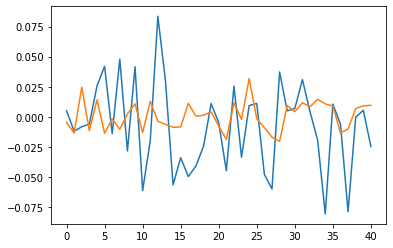

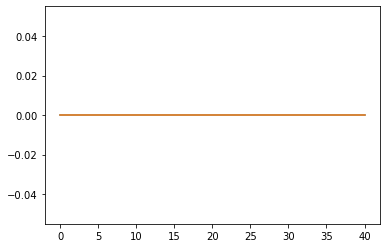

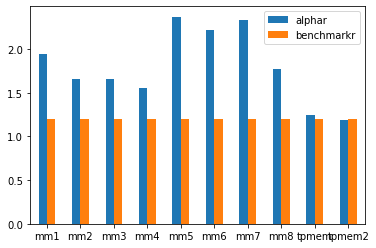

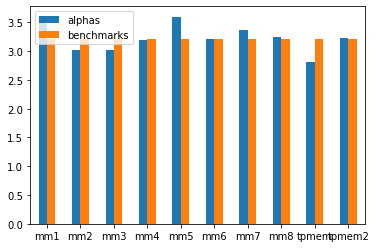

In [60]:
sig=get_signalact2(mi12(stock), onlogrets(stock), delay=1)

In [61]:
# CDLCONCEALBABYSWALL - Concealing Baby Swallow
# integer = CDLCONCEALBABYSWALL(open, high, low, close)
def mi13(data):
    mi=[]
    for i in range(len(data)):
        if len(data[i])>0:
            s=ta.CDLCONCEALBABYSWALL(np.asarray(list(data[i]['Open'])), np.asarray(list(data[i]['High'])), np.asarray(list(data[i]['Low'])), np.asarray(list(data[i]['Close'])))
            x=np.nan_to_num(s, 0)
            mi.append(np.asarray(x))
    return getleneq(mi)[1]
mi13(stock)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

1007
41
1007
41
1007
41
1007
41
1007
41
1007
41
1007
41
1007
41
1007
41
1007
41
1007
41


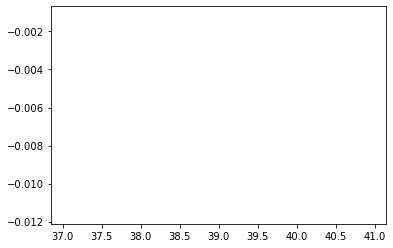

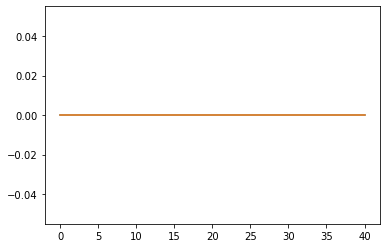

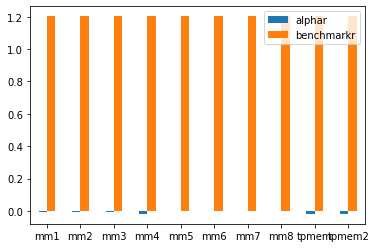

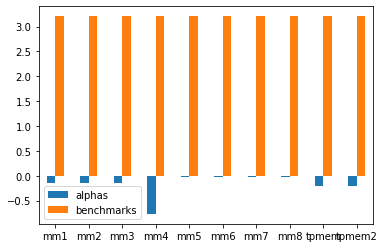

In [62]:
sig=get_signalact2(mi13(stock), onlogrets(stock), delay=1)

In [63]:
# CDLCOUNTERATTACK - Counterattack
# integer = CDLCOUNTERATTACK(open, high, low, close)
def mi14(data):
    mi=[]
    for i in range(len(data)):
        if len(data[i])>0:
            w=ta.CDLCOUNTERATTACK(np.asarray(list(data[i]['Open'])), np.asarray(list(data[i]['High'])), np.asarray(list(data[i]['Low'])), np.asarray(list(data[i]['Close'])))
            k=np.nan_to_num(w, 0)
            mi.append(np.asarray(k))
    return getleneq(mi)[1]
mi14(stock)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

1007
41
1007
41
1007
41
1007
41
1007
41
1007
41
1007
41
1007
41
1007
41
1007
41
1007
41


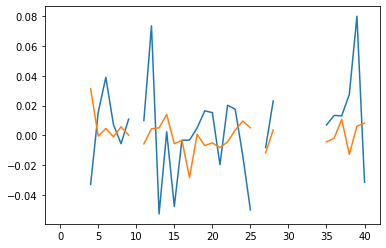

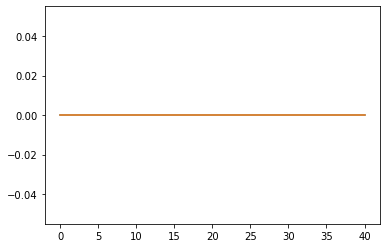

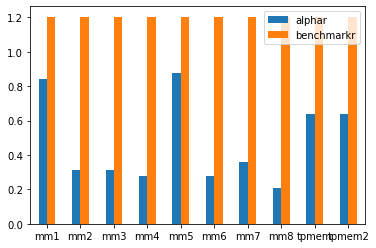

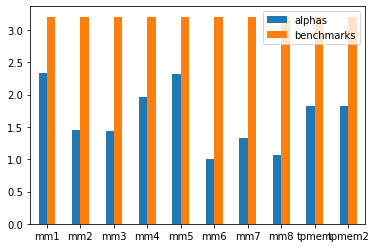

In [64]:
sig=get_signalact2(mi14(stock), onlogrets(stock), delay=1)

In [65]:
# CDLDARKCLOUDCOVER - Dark Cloud Cover
# integer = CDLDARKCLOUDCOVER(open, high, low, close, penetration=0)
def mi15(data):
    mi=[]
    for i in range(len(data)):
        if len(data[i])>0:
            h=ta.CDLDARKCLOUDCOVER(np.asarray(list(data[i]['Open'])), np.asarray(list(data[i]['High'])), np.asarray(list(data[i]['Low'])), np.asarray(list(data[i]['Close'])), penetration=0)
            m=np.nan_to_num(h, 0)
            mi.append(np.asarray(m))
    return getleneq(mi)[1]
mi15(stock)
        

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

1007
41
1007
41
1007
41
1007
41
1007
41
1007
41
1007
41
1007
41
1007
41
1007
41
1007
41


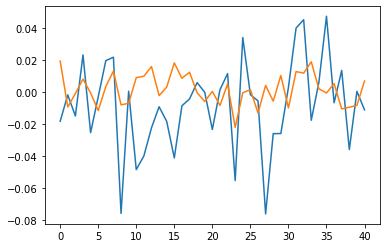

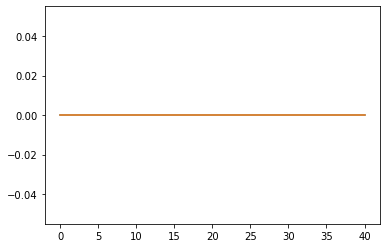

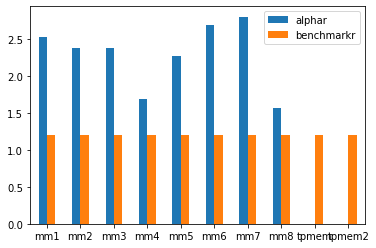

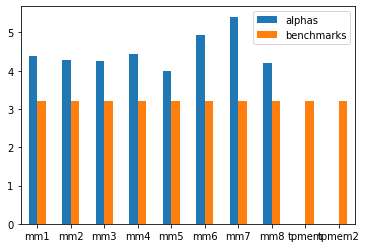

In [66]:
sig=get_signalact2(mi15(stock), onlogrets(stock), delay=1)

In [69]:
# CDLDOJI - Doji
# integer = CDLDOJI(open, high, low, close)
def mi16(data):
    mi=[]
    for i in range(len(data)):
        if len(data[i])>0:
            int1=ta.CDLDOJI(np.asarray(list(data[i]['Open'])), np.asarray(list(data[i]['High'])), np.asarray(list(data[i]['Low'])), np.asarray(list(data[i]['Close'])))
            int01=np.nan_to_num(int1, 0)
            mi.append(np.asarray(int01))
    return getleneq(mi)[1]
mi16(stock)
        

array([[  0,   0,   0, ...,   0,   0, 100],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ...,   0, 100,   0],
       [  0,   0,   0, ..., 100,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0]])

1007
41
1007
41
1007
41
1007
41
1007
41
1007
41
1007
41
1007
41
1007
41
1007
41
1007
41


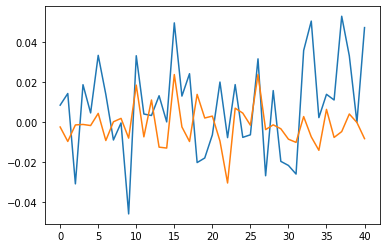

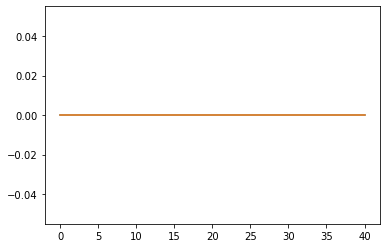

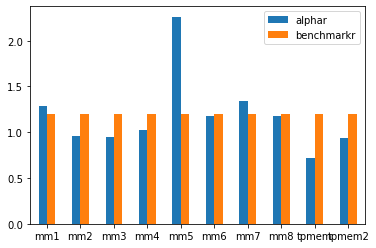

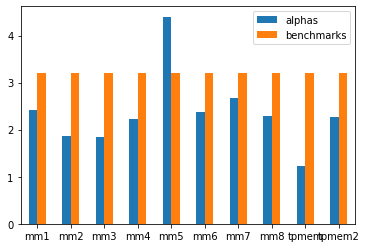

In [70]:
sig=get_signalact2(mi16(stock), onlogrets(stock), delay=1)

In [71]:
# CDLDOJISTAR - Doji Star
# integer = CDLDOJISTAR(open, high, low, close)
def mi17(data):
    mi=[]
    for i in range(len(data)):
        if len(data[i])>0:
            int2=ta.CDLDOJISTAR(np.asarray(list(data[i]['Open'])), np.asarray(list(data[i]['High'])), np.asarray(list(data[i]['Low'])), np.asarray(list(data[i]['Close'])))
            int02=np.nan_to_num(int2, 0)
            mi.append(np.asarray(int02))
    return getleneq(mi)[1]
mi17(stock)
        

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

1007
41
1007
41
1007
41
1007
41
1007
41
1007
41
1007
41
1007
41
1007
41
1007
41
1007
41


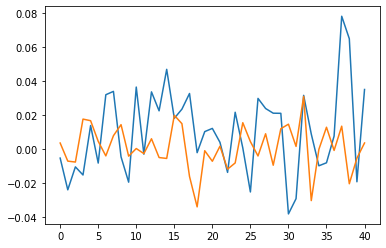

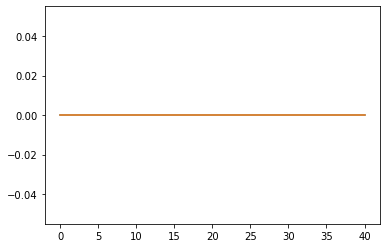

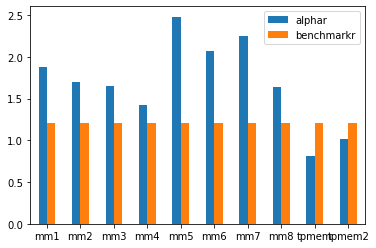

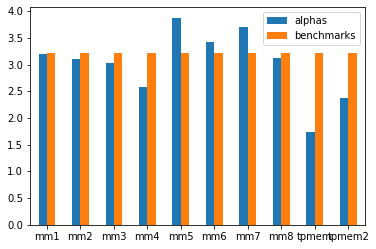

In [72]:
sig=get_signalact2(mi17(stock), onlogrets(stock), delay=1)

In [73]:
#CDLDRAGONFLYDOJI - Dragonfly Doji
#integer = CDLDRAGONFLYDOJI(open, high, low, close)
def mi18(data):
    mi=[]
    for i in range(len(data)):
        if len(data[i])>0:
            int3=ta.CDLDRAGONFLYDOJI(np.asarray(list(data[i]['Open'])), np.asarray(list(data[i]['High'])), np.asarray(list(data[i]['Low'])), np.asarray(list(data[i]['Close'])))
            int03=np.nan_to_num(int3, 0)
            mi.append(np.asarray(int03))
    return getleneq(mi)[1]
mi18(stock)
        

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

1007
41
1007
41
1007
41
1007
41
1007
41
1007
41
1007
41
1007
41
1007
41
1007
41
1007
41


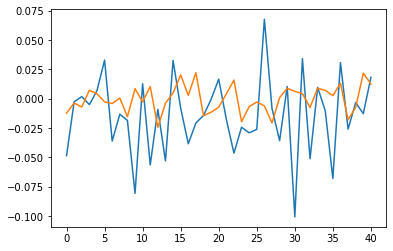

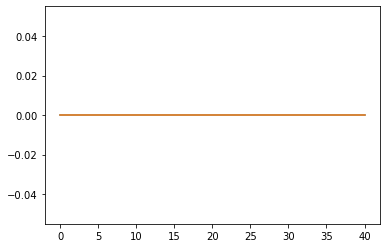

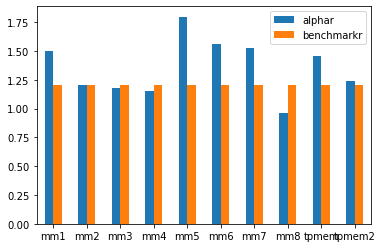

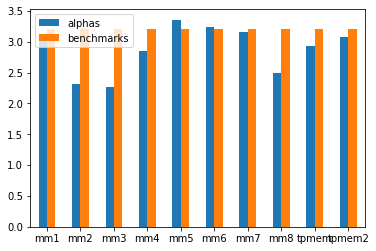

In [74]:
sig=get_signalact2(mi18(stock), onlogrets(stock), delay=1)

In [75]:
#CDLENGULFING - Engulfing Pattern
#integer = CDLENGULFING(open, high, low, close)
def mi19(data):
    mi=[]
    for i in range(len(data)):
        if len(data[i])>0:
            int4=ta.CDLENGULFING(np.asarray(list(data[i]['Open'])), np.asarray(list(data[i]['High'])), np.asarray(list(data[i]['Low'])), np.asarray(list(data[i]['Close'])))
            int04=np.nan_to_num(int4, 0)
            mi.append(np.asarray(int04))
    return getleneq(mi)[1]
mi19(stock)
        

array([[   0,    0,    0, ...,    0,    0,    0],
       [   0,    0,    0, ...,    0,    0,    0],
       [   0,    0,    0, ...,  100,    0,  100],
       ...,
       [   0,    0,    0, ...,    0,    0,    0],
       [   0,    0,    0, ...,    0, -100,    0],
       [   0,    0,    0, ...,    0,    0,    0]])

1007
41
1007
41
1007
41
1007
41
1007
41
1007
41
1007
41
1007
41
1007
41
1007
41
1007
41


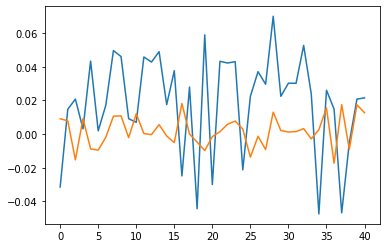

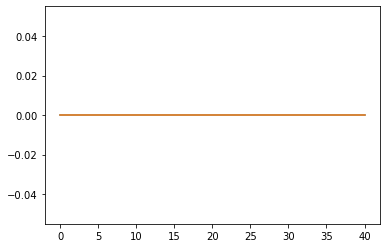

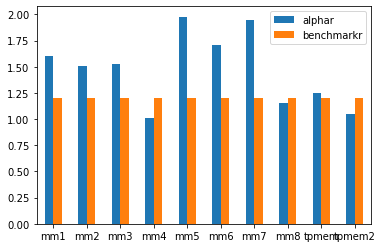

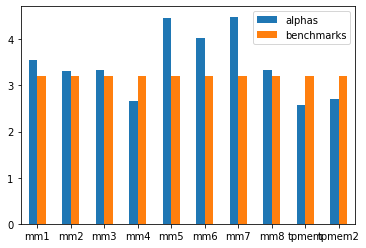

In [76]:
sig=get_signalact2(mi19(stock), onlogrets(stock), delay=1)

In [77]:
#CDLEVENINGDOJISTAR - Evening Doji Star
#integer = CDLEVENINGDOJISTAR(open, high, low, close, penetration=0)
def mi20(data):
    mi=[]
    for i in range(len(data)):
        if len(data[i])>0:
            int5=ta.CDLEVENINGDOJISTAR(np.asarray(list(data[i]['Open'])), np.asarray(list(data[i]['High'])), np.asarray(list(data[i]['Low'])), np.asarray(list(data[i]['Close'])))
            int05=np.nan_to_num(int5, 0)
            mi.append(np.asarray(int05))
    return getleneq(mi)[1]
mi20(stock)
        

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

1007
41
1007
41
1007
41
1007
41
1007
41
1007
41
1007
41
1007
41
1007
41
1007
41
1007
41


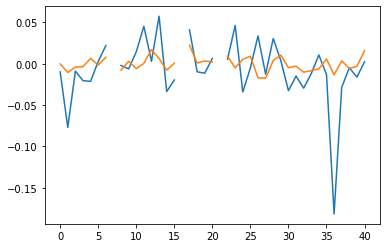

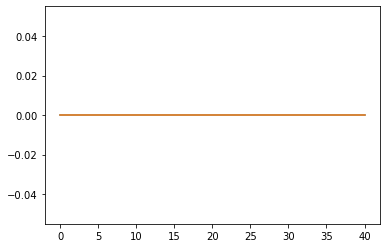

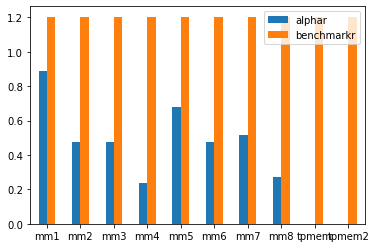

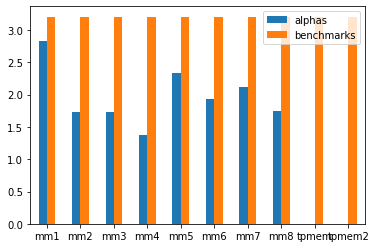

In [78]:
sig=get_signalact2(mi20(stock), onlogrets(stock), delay=1)

In [79]:
#CDLEVENINGSTAR - Evening Star
#integer = CDLEVENINGSTAR(open, high, low, close, penetration=0)
def mi21(data):
    mi=[]
    for i in range(len(data)):
        if len(data[i])>0:
            int6=ta.CDLEVENINGSTAR(np.asarray(list(data[i]['Open'])), np.asarray(list(data[i]['High'])), np.asarray(list(data[i]['Low'])), np.asarray(list(data[i]['Close'])), penetration=0)
            int06=np.nan_to_num(int6, 0)
            mi.append(np.asarray(int06))
    return getleneq(mi)[1]
mi21(stock)
        

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

1007
41
1007
41
1007
41
1007
41
1007
41
1007
41
1007
41
1007
41
1007
41
1007
41
1007
41


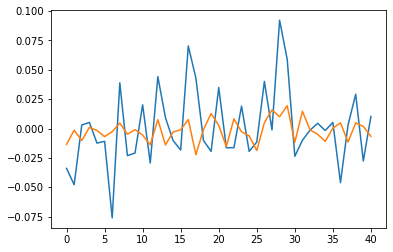

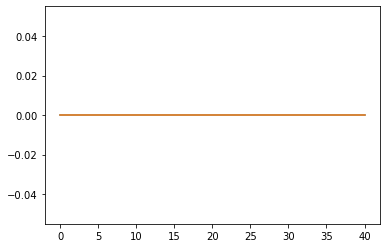

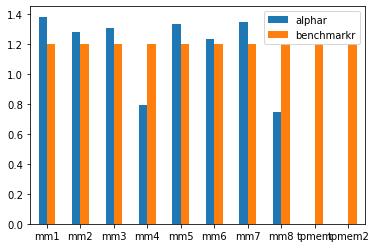

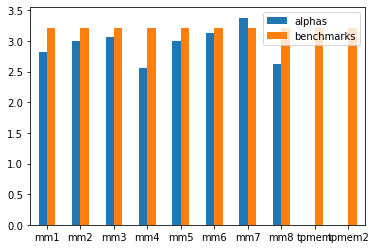

In [80]:
sig=get_signalact2(mi21(stock), onlogrets(stock), delay=1)

In [81]:
#CDLGAPSIDESIDEWHITE - Up/Down-gap side-by-side white lines
#integer = CDLGAPSIDESIDEWHITE(open, high, low, close)
def mi22(data):
    mi=[]
    for i in range(len(data)):
        if len(data[i])>0:
            int7=ta.CDLGAPSIDESIDEWHITE(np.asarray(list(data[i]['Open'])), np.asarray(list(data[i]['High'])), np.asarray(list(data[i]['Low'])), np.asarray(list(data[i]['Close'])))
            int07=np.nan_to_num(int7, 0)
            mi.append(np.asarray(int07))
    return getleneq(mi)[1]
mi22(stock)
        

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

1007
41
1007
41
1007
41
1007
41
1007
41
1007
41
1007
41
1007
41
1007
41
1007
41
1007
41


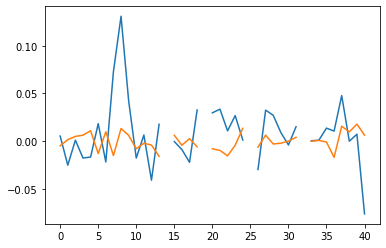

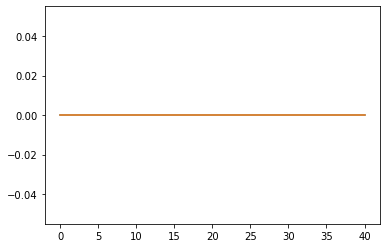

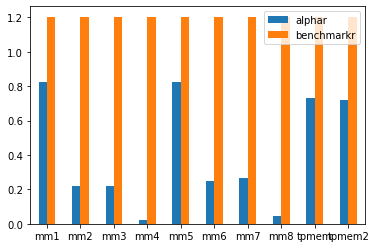

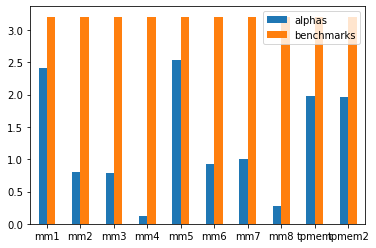

In [82]:
sig=get_signalact2(mi22(stock), onlogrets(stock), delay=1)

In [83]:
#CDLGRAVESTONEDOJI - Gravestone Doji
#integer = CDLGRAVESTONEDOJI(open, high, low, close)
def mi23(data):
    mi=[]
    for i in range(len(data)):
        if len(data[i])>0:
            int8=ta.CDLGRAVESTONEDOJI(np.asarray(list(data[i]['Open'])), np.asarray(list(data[i]['High'])), np.asarray(list(data[i]['Low'])), np.asarray(list(data[i]['Close'])))
            int08=np.nan_to_num(int8, 0)
            mi.append(np.asarray(int08))
    return getleneq(mi)[1]
mi23(stock)
        

array([[  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ...,   0, 100,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0]])

1007
41
1007
41
1007
41
1007
41
1007
41
1007
41
1007
41
1007
41
1007
41
1007
41
1007
41


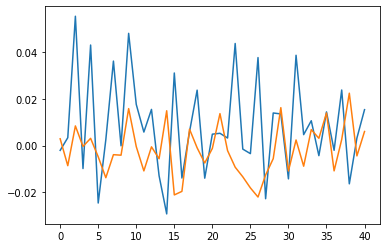

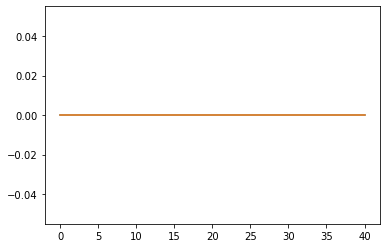

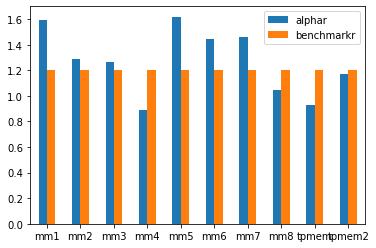

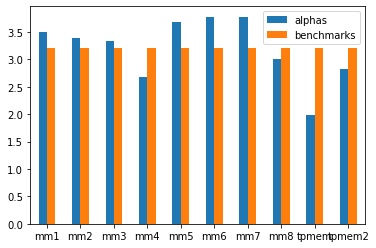

In [84]:
sig=get_signalact2(mi23(stock), onlogrets(stock), delay=1)

In [85]:
#CDLHAMMER - Hammer
#integer = CDLHAMMER(open, high, low, close)
def mi24(data):
    mi=[]
    for i in range(len(data)):
        if len(data[i])>0:
            int9=ta.CDLHAMMER(np.asarray(list(data[i]['Open'])), np.asarray(list(data[i]['High'])), np.asarray(list(data[i]['Low'])), np.asarray(list(data[i]['Close'])))
            int09=np.nan_to_num(int9, 0)
            mi.append(np.asarray(int09))
    return getleneq(mi)[1]
mi24(stock)
        

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

1007
41
1007
41
1007
41
1007
41
1007
41
1007
41
1007
41
1007
41
1007
41
1007
41
1007
41


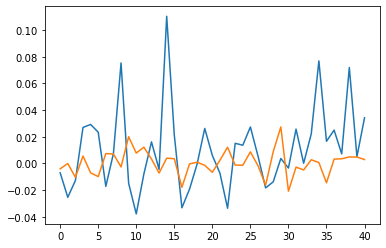

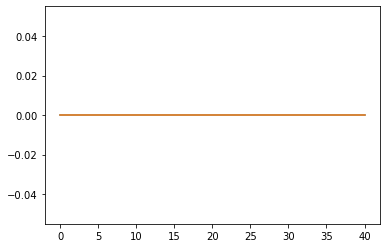

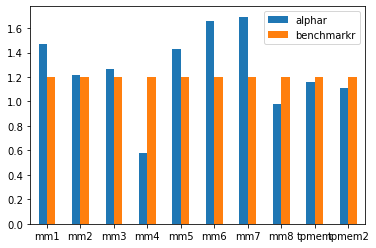

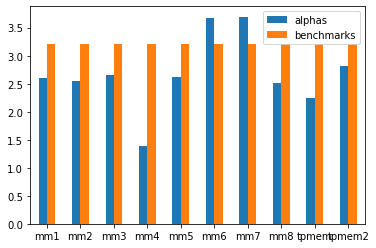

In [86]:
sig=get_signalact2(mi24(stock), onlogrets(stock), delay=1)

In [87]:
#CDLHANGINGMAN - Hanging Man
#integer = CDLHANGINGMAN(open, high, low, close)
def mi25(data):
    mi=[]
    for i in range(len(data)):
        if len(data[i])>0:
            int10=ta.CDLHANGINGMAN(np.asarray(list(data[i]['Open'])), np.asarray(list(data[i]['High'])), np.asarray(list(data[i]['Low'])), np.asarray(list(data[i]['Close'])))
            int010=np.nan_to_num(int10, 0)
            mi.append(np.asarray(int010))
    return getleneq(mi)[1]
mi25(stock)
        

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

1007
41
1007
41
1007
41
1007
41
1007
41
1007
41
1007
41
1007
41
1007
41
1007
41
1007
41


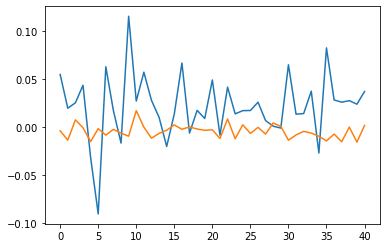

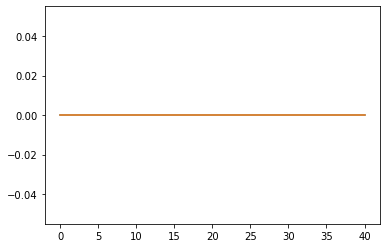

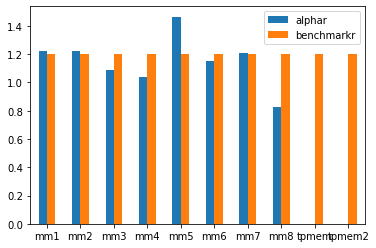

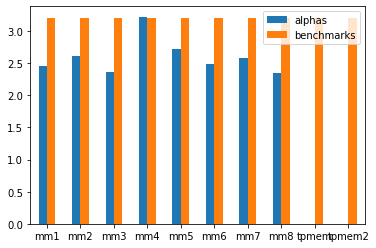

In [88]:
sig=get_signalact2(mi25(stock), onlogrets(stock), delay=1)

In [89]:
#CDLHARAMI - Harami Pattern
#integer = CDLHARAMI(open, high, low, close)
def mi26(data):
    mi=[]
    for i in range(len(data)):
        if len(data[i])>0:
            int11=ta.CDLHARAMI(np.asarray(list(data[i]['Open'])), np.asarray(list(data[i]['High'])), np.asarray(list(data[i]['Low'])), np.asarray(list(data[i]['Close'])))
            int011=np.nan_to_num(int11, 0)
            mi.append(np.asarray(int011))
    return getleneq(mi)[1]
mi26(stock)
        

array([[   0,    0,    0, ...,    0,    0, -100],
       [   0,    0,    0, ...,    0,    0,    0],
       [   0,    0,    0, ...,    0, -100,    0],
       ...,
       [   0,    0,    0, ...,    0,    0,    0],
       [   0,    0,    0, ...,    0,    0,    0],
       [   0,    0,    0, ...,    0,    0,    0]])

1007
41
1007
41
1007
41
1007
41
1007
41
1007
41
1007
41
1007
41
1007
41
1007
41
1007
41


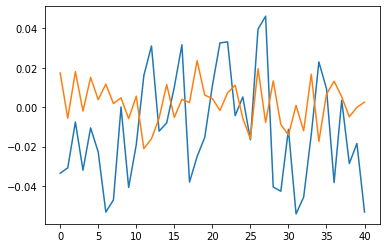

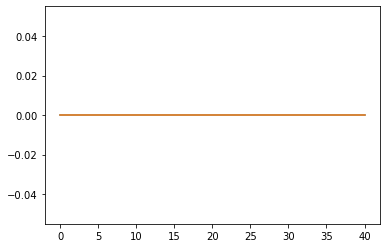

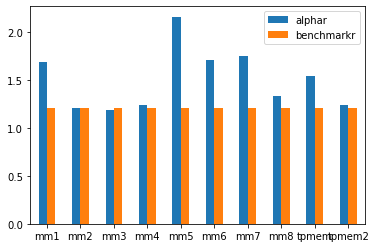

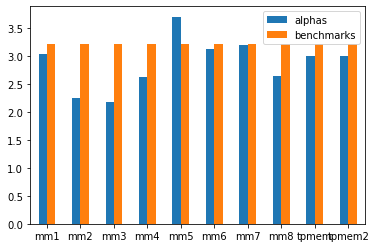

In [90]:
sig=get_signalact2(mi26(stock), onlogrets(stock), delay=1)

In [91]:
#CDLHARAMICROSS - Harami Cross Pattern
#integer = CDLHARAMICROSS(open, high, low, close)
def mi27(data):
    mi=[]
    for i in range(len(data)):
        if len(data[i])>0:
            int12=ta.CDLHARAMICROSS(np.asarray(list(data[i]['Open'])), np.asarray(list(data[i]['High'])), np.asarray(list(data[i]['Low'])), np.asarray(list(data[i]['Close'])))
            int012=np.nan_to_num(int12, 0)
            mi.append(np.asarray(int012))
    return getleneq(mi)[1]
mi27(stock)
        

array([[   0,    0,    0, ...,    0,    0, -100],
       [   0,    0,    0, ...,    0,    0,    0],
       [   0,    0,    0, ...,    0,    0,    0],
       ...,
       [   0,    0,    0, ...,    0,    0,    0],
       [   0,    0,    0, ...,    0,    0,    0],
       [   0,    0,    0, ...,    0,    0,    0]])

1007
41
1007
41
1007
41
1007
41
1007
41
1007
41
1007
41
1007
41
1007
41
1007
41
1007
41


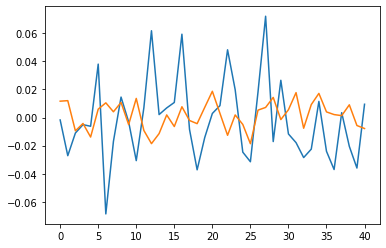

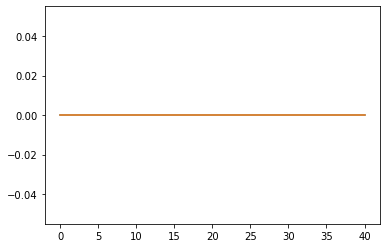

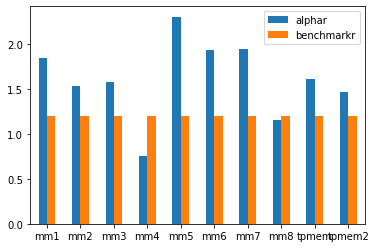

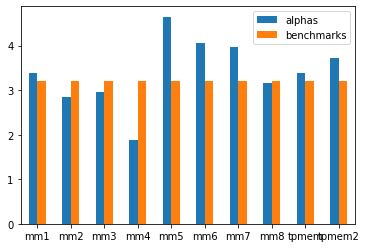

In [92]:
sig=get_signalact2(mi27(stock), onlogrets(stock), delay=1)

In [93]:
#CDLHIGHWAVE - High-Wave Candle
#integer = CDLHIGHWAVE(open, high, low, close)
def mi28(data):
    mi=[]
    for i in range(len(data)):
        if len(data[i])>0:
            int13=ta.CDLHIGHWAVE(np.asarray(list(data[i]['Open'])), np.asarray(list(data[i]['High'])), np.asarray(list(data[i]['Low'])), np.asarray(list(data[i]['Close'])))
            int013=np.nan_to_num(int13, 0)
            mi.append(np.asarray(int013))
    return getleneq(mi)[1]
mi28(stock)
        

array([[  0,   0,   0, ...,   0,   0, 100],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ...,   0,   0, 100],
       [  0,   0,   0, ..., 100,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0]])

1007
41
1007
41
1007
41
1007
41
1007
41
1007
41
1007
41
1007
41
1007
41
1007
41
1007
41


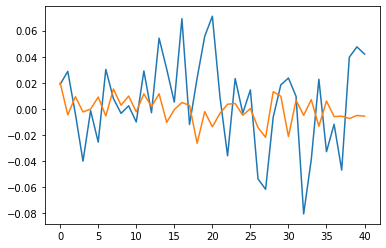

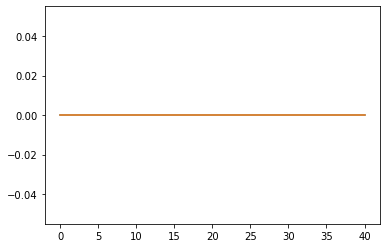

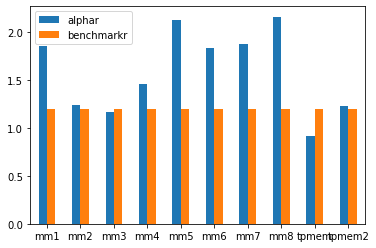

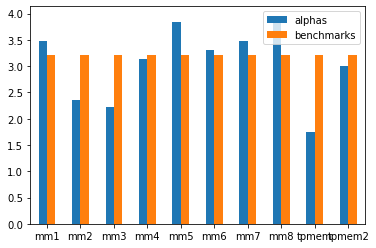

In [94]:
sig=get_signalact2(mi28(stock), onlogrets(stock), delay=1)

In [95]:
#CDLHIKKAKE - Hikkake Pattern
#integer = CDLHIKKAKE(open, high, low, close)
def mi29(data):
    mi=[]
    for i in range(len(data)):
        if len(data[i])>0:
            int14=ta.CDLHIKKAKE(np.asarray(list(data[i]['Open'])), np.asarray(list(data[i]['High'])), np.asarray(list(data[i]['Low'])), np.asarray(list(data[i]['Close'])))
            int014=np.nan_to_num(int14, 0)
            mi.append(np.asarray(int014))
    return getleneq(mi)[1]
mi29(stock)

array([[   0,    0,    0, ...,    0,    0,    0],
       [   0,    0,    0, ..., -200,    0,    0],
       [   0,    0,    0, ...,  200,    0,    0],
       ...,
       [   0,    0,    0, ...,    0,    0,    0],
       [   0,    0,    0, ...,    0,    0,    0],
       [   0,    0,    0, ...,    0,    0,    0]])

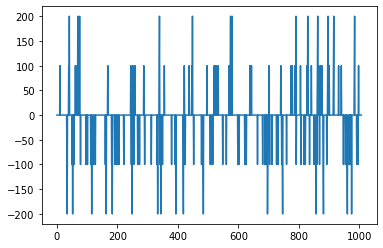

In [96]:
plt.plot(mi29(stock)[0])

In [97]:
mi29(stock)[0][:50]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,  100,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
       -100, -200,    0,    0,    0,    0,  100,    0,  200,    0,    0,
          0,    0,    0,    0,    0,    0])

1007
41
1007
41
1007
41
1007
41
1007
41
1007
41
1007
41
1007
41
1007
41
1007
41
1007
41


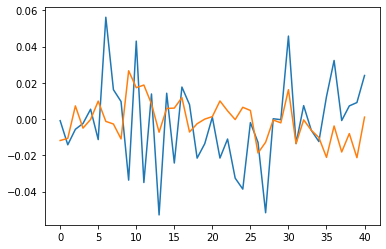

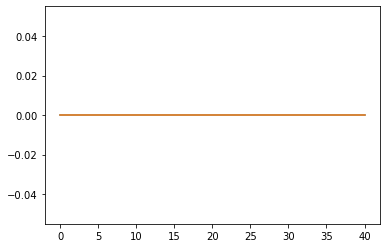

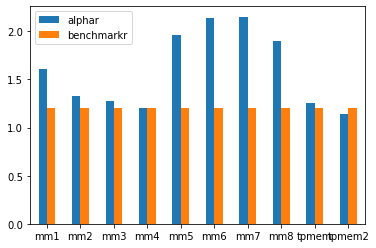

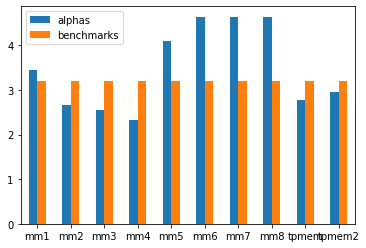

In [98]:
sig=get_signalact2(mi29(stock), onlogrets(stock), delay=1)